In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt
from sklearn import tree
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [2]:
!pip install pydotplus


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#conda install -c anaconda-graphviz
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
data_train = pd.read_csv('/content/data.csv')
data_test = pd.read_csv('/content/test.csv')

In [7]:
data_train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [8]:
data_train['Severity'].value_counts(normalize=True)*100

Highly_Fatal_And_Damaging                  30.49
Significant_Damage_And_Serious_Injuries    27.29
Minor_Damage_And_Injuries                  25.27
Significant_Damage_And_Fatalities          16.95
Name: Severity, dtype: float64

# Exploratory Data Analysis

In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [12]:
data_train.isnull().sum() # Checking if there is any null value in the dataset

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [13]:
# Drop the target and check how the features correlate
data_train.drop("Severity", axis=1).corr()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Safety_Score,1.000000,-0.685386,0.057726,0.000564,0.019603,0.032747,0.173930,0.004451,0.041735,-0.107925,-0.001334
Days_Since_Inspection,-0.685386,1.000000,-0.032055,-0.011963,-0.001564,-0.039140,-0.024718,0.000183,-0.016724,0.040804,0.000582
Total_Safety_Complaints,0.057726,-0.032055,1.000000,-0.019665,0.066412,0.013590,0.034927,0.036855,-0.019005,-0.002713,0.004527
Control_Metric,0.000564,-0.011963,-0.019665,1.000000,-0.643285,-0.008330,0.008385,-0.028375,-0.003284,-0.028296,0.006481
Turbulence_In_gforces,0.019603,-0.001564,0.066412,-0.643285,1.000000,0.010757,-0.007565,0.047625,0.013171,0.039802,-0.014396
Cabin_Temperature,0.032747,-0.039140,0.013590,-0.008330,0.010757,1.000000,0.030682,-0.009186,0.018619,-0.026647,0.014865
Accident_Type_Code,0.173930,-0.024718,0.034927,0.008385,-0.007565,0.030682,1.000000,0.019970,0.046379,-0.739361,-0.012278
Max_Elevation,0.004451,0.000183,0.036855,-0.028375,0.047625,-0.009186,0.019970,1.000000,-0.030513,0.173436,0.008576
Violations,0.041735,-0.016724,-0.019005,-0.003284,0.013171,0.018619,0.046379,-0.030513,1.000000,-0.021578,-0.002047
Adverse_Weather_Metric,-0.107925,0.040804,-0.002713,-0.028296,0.039802,-0.026647,-0.739361,0.173436,-0.021578,1.000000,0.008586


Observations  
Days since inspection has a strong -ve correlation with Safety Score  
Turbulence in gforces has a strong -ve correlation with Control Metric.   
Accident type code has a weak +ve correlation with the Safety Score.   
Adverse Weather Metric has a strong -ve correlation with Accident Type Code.   
Adverse Weather Metric has a weak +ve correlation with Max Elevation

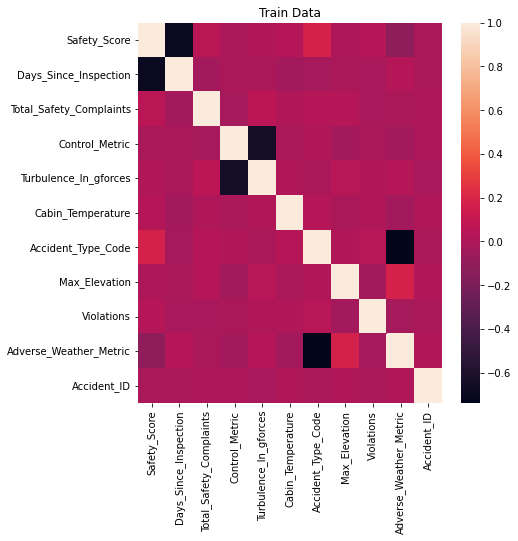

In [14]:
# Checking Corelation
pt.figure(figsize = (15, 7))
pt.subplot(1, 2, 1)
pt.title("Train Data")
sns.heatmap(data_train.corr())

In [15]:
data_train[data_train["Days_Since_Inspection"] == 1]

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
840,Significant_Damage_And_Serious_Injuries,58.675799,1,2,75.387420,0.336308,75.96,6,29146.687854,3,0.007526,9494
2283,Significant_Damage_And_Serious_Injuries,58.493151,1,5,75.387420,0.245792,76.11,6,16149.317704,3,0.003679,9705
2611,Highly_Fatal_And_Damaging,65.342466,1,19,77.848678,0.361191,79.65,2,31661.628810,2,0.429535,5430
7903,Highly_Fatal_And_Damaging,65.342466,1,8,58.204193,0.312146,79.43,2,28183.323130,2,0.382453,11009
8152,Significant_Damage_And_Serious_Injuries,58.493151,1,20,67.046490,0.409514,79.72,7,25135.851480,2,0.002300,361


In [16]:
# Checking the unique values for dependent Variable (Severity)
data_train.Severity.unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [17]:
# Checking the Unique Values in Accident_Type_Code
data_train.Accident_Type_Code.unique()

array([2, 7, 3, 4, 1, 6, 5])

In [18]:
# Checking the Unqiue Values in Violations
data_train.Violations.unique()

array([3, 2, 1, 0, 4, 5])

In [19]:
data_train['Severity'].describe()
# A description (4 level factor) on the severity of the crash

count                         10000
unique                            4
top       Highly_Fatal_And_Damaging
freq                           3049
Name: Severity, dtype: object

In [20]:
data_train['Safety_Score'].describe() 
# It gives a measure of how safe the plane was deemed to be.

count    10000.000000
mean        41.876406
std         16.138072
min          0.000000
25%         30.593607
50%         41.278539
75%         52.511416
max        100.000000
Name: Safety_Score, dtype: float64

In [21]:
data_train['Days_Since_Inspection'].describe() 
# It gives measure of how long the plane without inspection before incident

count    10000.000000
mean        12.931100
std          3.539803
min          1.000000
25%         11.000000
50%         13.000000
75%         15.000000
max         23.000000
Name: Days_Since_Inspection, dtype: float64

In [22]:
data_train['Total_Safety_Complaints'].describe()
# No. of complaints from mechanics prior to accident.

count    10000.000000
mean         6.564300
std          6.971982
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         54.000000
Name: Total_Safety_Complaints, dtype: float64

In [23]:
data_train['Control_Metric'].describe()
# An estimation of how much control the pilot had during the incident given the factors at play.

count    10000.000000
mean        65.145324
std         11.882934
min          0.000000
25%         56.927985
50%         65.587967
75%         73.336372
max        100.000000
Name: Control_Metric, dtype: float64

In [24]:
data_train['Turbulence_In_gforces'].describe()
# Recorded turbulence experienced at the time of accident.

count    10000.000000
mean         0.381495
std          0.121301
min          0.134000
25%          0.293665
50%          0.365879
75%          0.451346
max          0.882648
Name: Turbulence_In_gforces, dtype: float64

In [25]:
data_train['Cabin_Temperature'].describe()
# Last recorded temp before incident.

count    10000.000000
mean        79.969331
std          2.759739
min         74.740000
25%         77.960000
50%         79.540000
75%         81.560000
max         97.510000
Name: Cabin_Temperature, dtype: float64

In [26]:
data_train['Cabin_Temperature'].describe()
# Last recorded temp before incident.

count    10000.000000
mean        79.969331
std          2.759739
min         74.740000
25%         77.960000
50%         79.540000
75%         81.560000
max         97.510000
Name: Cabin_Temperature, dtype: float64

In [27]:
data_train['Violations'].describe()
# Number of Violations aircraft received during inspection.

count    10000.00000
mean         2.01220
std          1.03998
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max          5.00000
Name: Violations, dtype: float64

# Feature Selection


In [28]:
#split dataset in features and target variable
feature_cols = ['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric','Turbulence_In_gforces'
                ,'Cabin_Temperature','Accident_Type_Code', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric', 'Accident_ID']
X = data_train[feature_cols] # Features
y = data_train.Severity # Target variable


In [29]:
# Split dataset into training set and Validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # 90% training and 10% test


In [30]:
print(X_train.shape)
print(X_test.shape)

(9000, 11)
(1000, 11)
